In [1]:
import numpy as np

In [5]:
a = np.random.rand(3, 2)
a

array([[0.69551859, 0.07013761],
       [0.40053197, 0.06203539],
       [0.69190971, 0.38994895]])

In [6]:
a[0]

array([0.69551859, 0.07013761])

In [7]:
a[:, 0]

array([0.69551859, 0.40053197, 0.69190971])

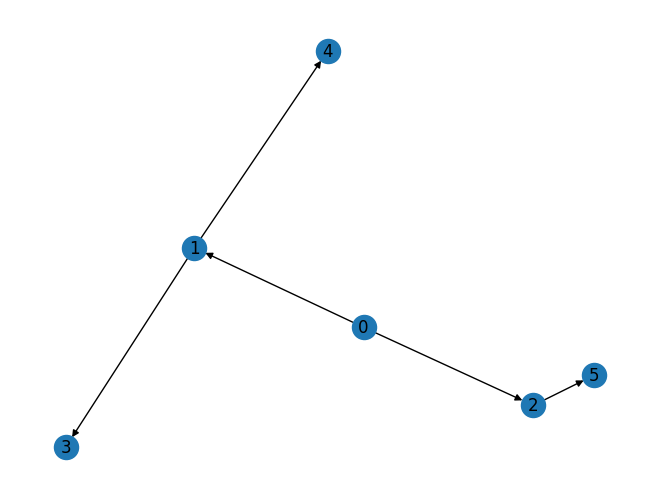

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph to represent the tree structure
G.add_edges_from([(0, 1), (0, 2), (1, 3), (1, 4), (2, 5)])

# Plot the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, arrows=True)
plt.show()


/tmp/ipykernel_27105/3754077899.py:12: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog='dot')


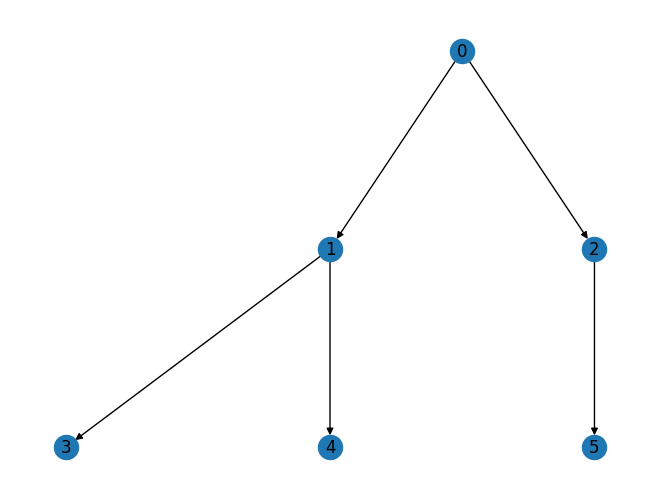

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph to represent the tree structure
G.add_edges_from([(0, 1), (0, 2), (1, 3), (1, 4), (2, 5)])

# Plot the graph using graphviz layout
pos = graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=True)
plt.show()


/tmp/ipykernel_27105/1612576556.py:15: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog='dot')


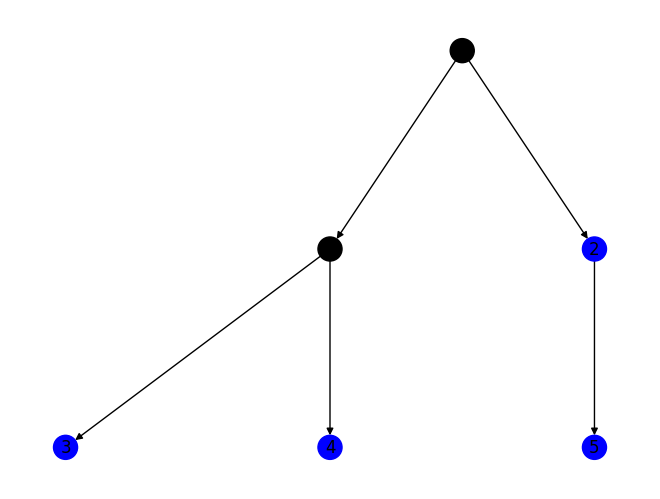

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph to represent the tree structure
G.add_edges_from([(0, 1), (0, 2), (1, 3), (1, 4), (2, 5)])

# Define node colors
node_colors = ['black' if node in [0, 1] else 'blue' for node in G.nodes()]

# Plot the graph using graphviz layout
pos = graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=True, node_color=node_colors)
plt.show()


/tmp/ipykernel_27105/917280656.py:15: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog='dot')


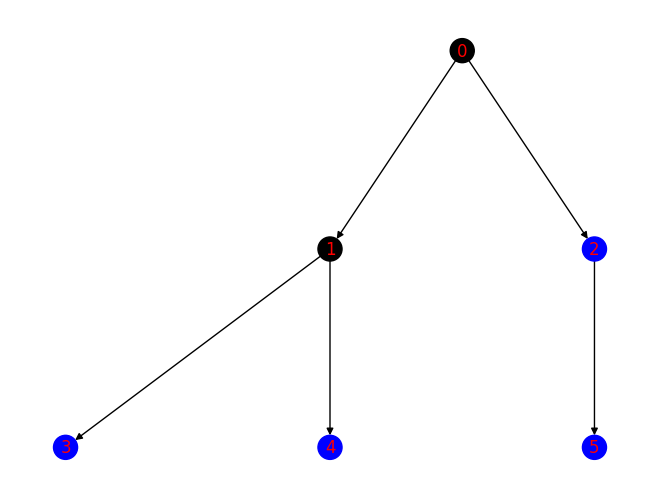

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph to represent the tree structure
G.add_edges_from([(0, 1), (0, 2), (1, 3), (1, 4), (2, 5)])

# Define node colors
node_colors = ['black' if node in [0, 1] else 'blue' for node in G.nodes()]

# Plot the graph using graphviz layout
pos = graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=True, node_color=node_colors, font_color='red')
plt.show()


In [13]:
import networkx as nx
import matplotlib.pyplot as plt

class Node:
        
    def __init__(self, action, parent, node_id, row, col):
        self.node_id = node_id
        self.action = action
        self.feasible = True
        self.parent = parent           
        self.children = []
        self.row = row
        self.col = col

    def add_child(self, action, row, col):
        child = Node(action, self, len(self.children) + self.node_id + 1, row, col)
        self.children.append(child)

    def plot(self):
        G = nx.DiGraph()
        pos = self.create_tree_graph(G, None, self)
        labels = self.get_labels()

        # Plotting the graph
        plt.figure(figsize=(8, 6))
        nx.draw(G, pos, with_labels=True, labels=labels, node_size=5000, node_color="lightblue", font_size=12, font_color="black", arrows=True)
        plt.show()

    def create_tree_graph(self, G, parent_node, node):
        if parent_node:
            G.add_edge(parent_node.node_id, node.node_id)
        for child in node.children:
            self.create_tree_graph(G, node, child)
        return self.assign_positions(G)

    def assign_positions(self, G):
        pos = {}
        for node in G.nodes():
            pos[node] = (G.nodes[node]['col'], -G.nodes[node]['row'])
        return pos

    def get_labels(self):
        labels = {}
        for node in self.traverse():
            labels[node.node_id] = str(node.action)
        return labels

    def traverse(self):
        nodes = [self]
        for node in nodes:
            nodes.extend(node.children)
        return nodes

# Example usage:
# Create a root node
root = Node(0, None, 0, 0, 0)

# Add some child nodes
root.add_child(1, 1, 0)
root.add_child(2, 1, 1)
root.children[0].add_child(3, 2, 0)
root.children[0].add_child(4, 2, 1)

# Plot the tree
root.plot()


KeyError: 'col'